In [ ]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0)
ERROR: No matching distribution found for tensorflow==2.7.0


In [ ]:
#importation des bilbliothèques

import os
import numpy as np
#import librabries
import tensorflow as tf
from tensorflow.keras import models, layers
from matplotlib import pyplot as plt
import cv2
import sys
import requests
import zipfile
import gdown
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random
import pickle
from tqdm import tqdm
import shutil
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sn
from keras.layers import Dense, Flatten
#from PIL import Image
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Télécharge notre dataset à partir de du drive en utilisant le lien de téléchargement et le dataset est public
!gdown --id 10jQXkCMtMmqR6breeaWctN6tT-lYdaLV
# dézipper le fichier
!unzip TomatoDS.zip
# Supprimer le fichier zippé
!rm -r /content/TomatoDS.zip

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=10jQXkCMtMmqR6breeaWctN6tT-lYdaLV 

unzip:  cannot find or open TomatoDS.zip, TomatoDS.zip.zip or TomatoDS.zip.ZIP.
rm: cannot remove '/content/TomatoDS.zip': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = 200
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [ ]:
#on mélange les différentes classe de notre dataset, on défini une dimension pour chaque image et on défini la taille du batch
images_dataset=tf.keras.preprocessing.image_dataset_from_directory(
 '/content/Data',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,

)

Found 8913 files belonging to 10 classes.


In [ ]:
class_names=images_dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
#on affiche la taille de notre dataset qui correspond au nombre de batches de notre dataset
len(images_dataset)

279

In [ ]:
279*32

8928

In [ ]:
#on découvre notre dataset en affichant la forme d'un batches et les valeurs de labélisation numérique des différentes classe de notre dataset
for image_batch, label_batch in images_dataset.take(2):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 200, 200, 3)
[0 7 3 2 7 1 5 4 5 4 7 7 5 3 4 7 5 0 6 9 0 2 0 6 7 2 1 9 4 2 2 7]
(32, 200, 200, 3)
[3 7 7 7 7 7 0 9 5 2 7 7 0 5 2 4 9 1 7 7 4 6 3 6 6 3 7 0 2 8 4 7]


In [ ]:
#affichage de la première image de ce batch
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch[0].numpy())

[[[103.2268    90.2268    99.2268  ]
  [105.3972    92.3972   101.3972  ]
  [109.532     96.532    105.532   ]
  ...
  [108.16804   95.16804  102.16804 ]
  [119.12564  106.12564  113.12564 ]
  [135.7756   122.775604 129.7756  ]]

 [[104.6616    91.6616   100.6616  ]
  [ 96.383995  83.383995  92.383995]
  [106.173996  93.173996 102.173996]
  ...
  [104.3801    91.3801    98.3801  ]
  [103.791214  90.791214  97.791214]
  [103.670395  90.670395  97.670395]]

 [[110.314     97.314    106.314   ]
  [ 95.242004  82.242004  91.242004]
  [107.78      94.78     103.78    ]
  ...
  [119.610085 106.610085 113.610085]
  [116.414    103.414    110.414   ]
  [110.05999   97.05999  104.05999 ]]

 ...

 [[170.03397  160.03397  169.03397 ]
  [176.32802  166.32802  175.32802 ]
  [173.09003  163.09003  172.09003 ]
  ...
  [169.61002  159.61002  167.61002 ]
  [167.87999  157.87999  165.87999 ]
  [171.99799  161.99799  169.99799 ]]

 [[171.75879  161.75879  170.75879 ]
  [174.9164   164.9164   173.9164  ]


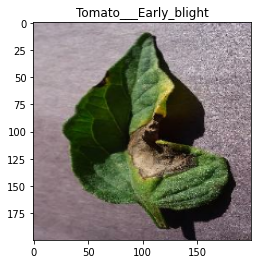

In [ ]:
#visualiser la première image de ce batch
for image_batch, label_batch in images_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('on')

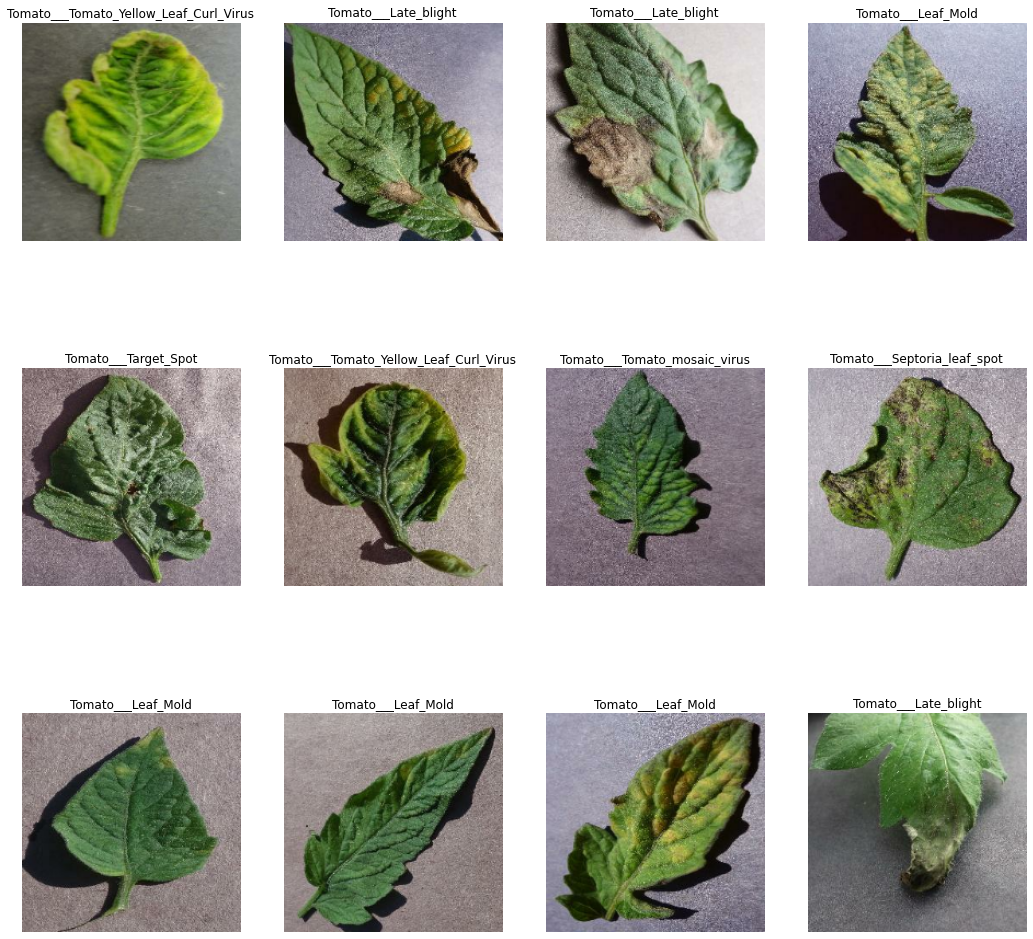

In [ ]:
#visualiser quelques premières images de ce  batch
plt.figure(figsize=(18,18))
for image_batch, label_batch in images_dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
#fonction pour séparer notre dataset en données d'entrainement, de validation et de test
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size= int(train_split* ds_size)
    val_size=int(val_split* ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)

    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(images_dataset)

In [ ]:
print(len(train_ds),len(val_ds),len(test_ds))

223 27 29


In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([

    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([

    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
#construction du model
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=10
model=models.Sequential([
    resize_and_rescale,
    #data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
#get the summary of ftp
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 200, 200, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 198, 198, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 99, 99, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 97, 97, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 48, 48, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 46, 46, 64)         

In [ ]:
model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
#entrainement du model
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/50
223/223 [==============================] - 36s 84ms/step - loss: 1.8181 - accuracy: 0.3494 - val_loss: 1.5836 - val_accuracy: 0.4433
Epoch 2/50
223/223 [==============================] - 8s 37ms/step - loss: 1.2428 - accuracy: 0.5583 - val_loss: 0.9556 - val_accuracy: 0.6678
Epoch 3/50
223/223 [==============================] - 8s 36ms/step - loss: 0.7731 - accuracy: 0.7364 - val_loss: 0.5928 - val_accuracy: 0.7951
Epoch 4/50
223/223 [==============================] - 8s 37ms/step - loss: 0.5640 - accuracy: 0.8045 - val_loss: 0.4238 - val_accuracy: 0.8438
Epoch 5/50
223/223 [==============================] - 8s 37ms/step - loss: 0.4560 - accuracy: 0.8415 - val_loss: 0.3449 - val_accuracy: 0.8750
Epoch 6/50
223/223 [==============================] - 8s 37ms/step - loss: 0.3643 - accuracy: 0.8693 - val_loss: 0.3367 - val_accuracy: 0.8819
Epoch 7/50
223/223 [==============================] - 8s 37ms/step - loss: 0.3519 - accuracy: 0.8775 - val_loss: 0.3316 - val_accuracy: 0.878

In [ ]:
#evaluate the model
scores = model.evaluate(test_ds)

29/29 [==============================] - 8s 15ms/step - loss: 0.1045 - accuracy: 0.9682


In [ ]:
scores

[0.10450371354818344, 0.9682365655899048]

In [ ]:
history

In [ ]:
print(history.params)

{'verbose': 1, 'epochs': 50, 'steps': 223}


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
len(history.history['accuracy'])

50

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

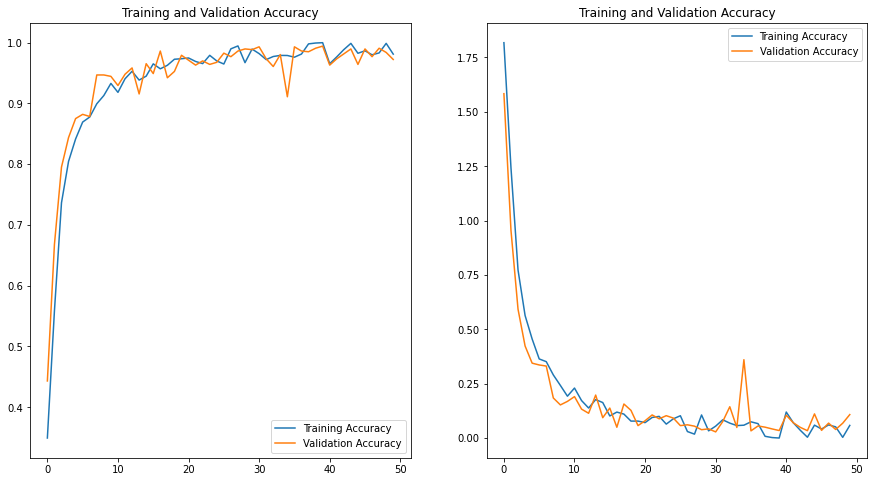

In [ ]:
#Plotting Accuracing and Loss Graph for Trained Model using Matplotlib with history call back
#plotting training and validation accuracy
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
#sauvegarder le modèle
#model.save('simple_nn.h5')

loaded_model = tf.keras.models.load_model("/content/model/simple_nn.h5")


In [ ]:
#faire la prédiction
for images_batch, label_batch in test_ds.take(1):
    image1=images_batch[0].numpy().astype('uint8')
    label1=label_batch[0].numpy()

    print('predicting the first image')
    plt.imshow(image1)
    print('Image1 True label:', class_names[label1])


    batch_prediction= loaded_model.predict(images_batch)
    print("Image1's predicted label:", class_names[np.argmax(batch_prediction[0])])

predicting the first image
Image1 True label: Tomato___Septoria_leaf_spot
Image1's predicted label: Tomato___Septoria_leaf_spot


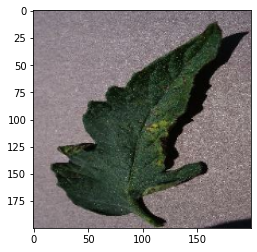

In [ ]:
#making predictions
for images_batch, label_batch in test_ds.take(1):
    image1=images_batch[0].numpy().astype('uint8')
    label1=label_batch[0].numpy()

    print('predicting the first image')
    plt.imshow(image1)
    print('Image1 True label:', class_names[label1])


    batch_prediction= model.predict(images_batch)
    print("Image1's predicted label:", class_names[np.argmax(batch_prediction[0])])



In [ ]:
#function to predict with confidence
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence


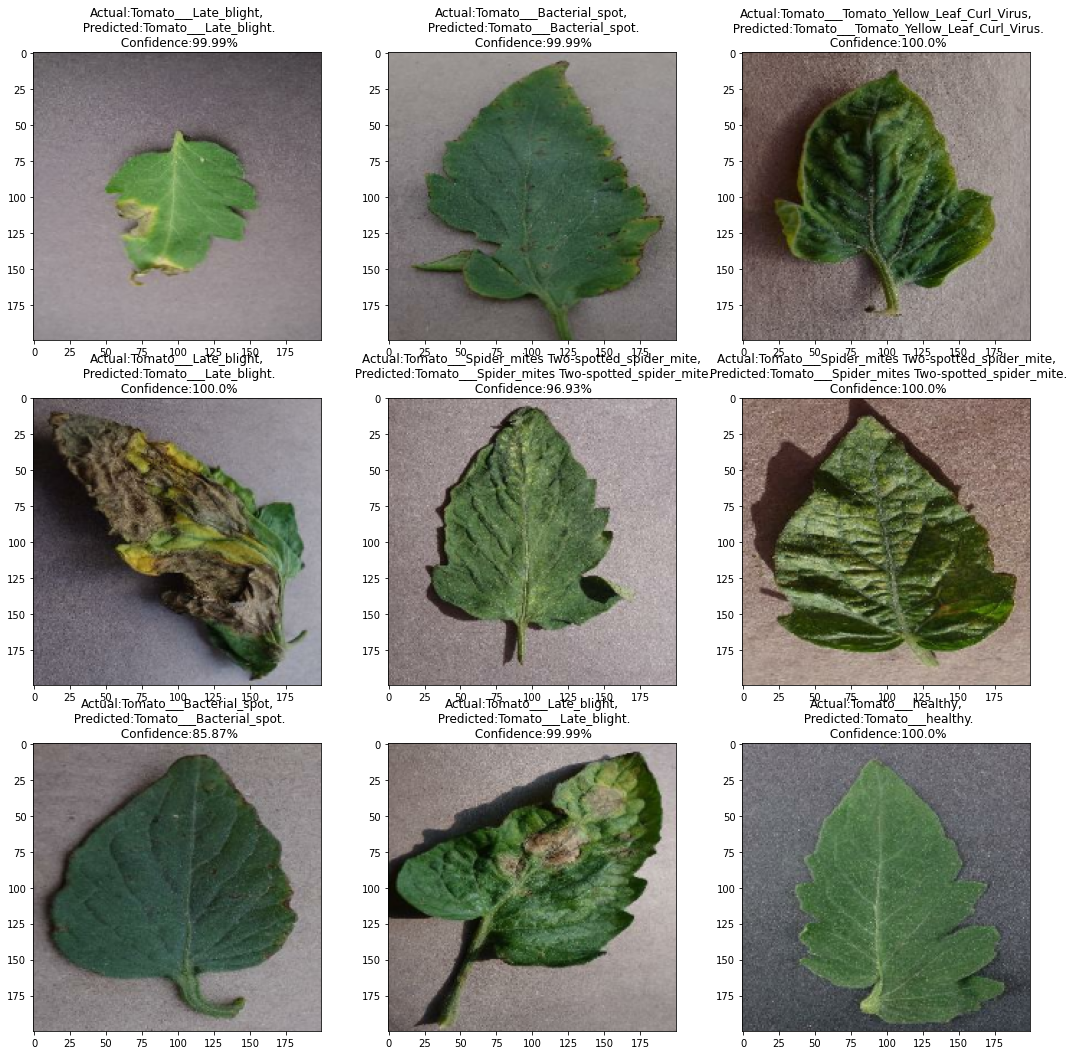

In [ ]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #print(images[0].shape)
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        plt.axis("off")


1/1 [==============================] - 0s 38ms/step


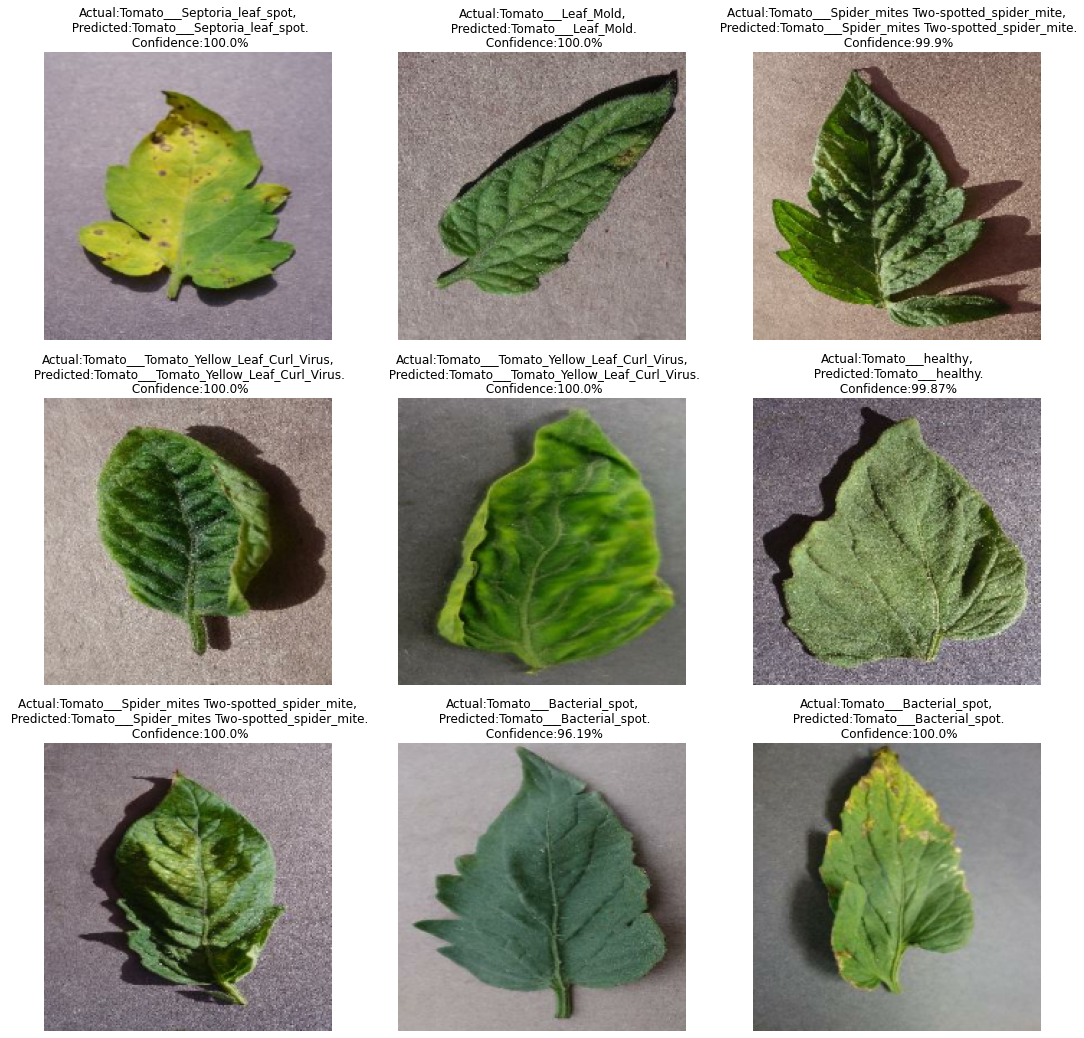

In [ ]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #print(images[0].shape)
        predicted_class,confidence=predict(loaded_model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        plt.axis("off")